### village_income_median
> 1.補中位數 group by town or city  
2.前後遞補法

In [58]:
sort = data_train_.sort_values(by=['city', 'town', 'village', 'village_income_median','txn_dt'])[['city', 'town', 'village', 'village_income_median', 'txn_dt']]
dist = sort[['city', 'town', 'village', 'village_income_median']].drop_duplicates()
dist_null = dist[dist['village_income_median'].isnull()]
# display(dist)
display(dist_null)

def check_timeEffect():
    dist_g = dist.groupby(['city', 'town', 'village'])['village_income_median']
    dist_minMax = dist.assign(min_VIM=dist_g.transform(min), max_VIM=dist_g.transform(max))
    dist_minMax['diff'] = dist_minMax['max_VIM'] - dist_minMax['min_VIM']
    display(dist_minMax[dist_minMax['diff'] != 0][dist_minMax['diff'].notna()])
# check_timeEffect() #No time effect


city_hasNull = data_train_[data_train_.loc.city == dist_null.city and data_train_.town == dist_null.town ][['city', 'town', 'village', 'village_income_median', 'txn_dt']]
city_hasNull.assign(min_CIM=city_hasNull.groupby(['city'])['village_income_median'].transform(min), max_CIM=city_hasNull.groupby(['city'])['village_income_median'].transform(max))



# #Back-fill or forward-fill
# #for back fill
# dataframe.fillna(method='bfill',inplace=True)
# #for forward-fill
# dataframe.fillna(method='ffill',inplace=True)



ValueError: Can only compare identically-labeled Series objects

### txn_floor 補值
> 1.遺漏 -> 補值  
2.獨棟 -> 999(視為另外一群)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:72: RuntimeWarning: divide by zero encountered in log2


,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,parking_price,txn_floor,land_area,building_area,town,lat,lon,village_income_median,town_population,town_area,town_population_density,doc_Rate,master_rate,bachelor_rate,jobschool_rate,highschool_rate,junior_rate,elementary_rate,born_rate,death_date,marriage_rate,divorce_rate,village,N_50,N_500,N_1000,N_5000,N_10000,I_10,I_50,I_index_50,I_100,I_250,I_500,I_index_500,I_1000,I_index_1000,I_5000,I_index_5000,I_10000,I_index_10000,I_MIN,II_10,II_50,II_index_50,II_100,II_250,II_500,II_index_500,II_1000,II_index_1000,II_5000,II_index_5000,II_10000,II_index_10000,II_MIN,III_10,III_50,III_index_50,III_100,III_250,III_500,III_index_500,III_1000,III_index_1000,III_5000,III_index_5000,III_10000,III_index_10000,III_MIN,IV_10,IV_50,IV_index_50,IV_100,IV_250,IV_500,IV_index_500,IV_1000,IV_index_1000,IV_5000,IV_index_5000,IV_10000,IV_index_10000,IV_MIN,V_10,V_50,V_index_50,V_100,V_250,V_500,V_index_500,V_1000,V_index_1000,V_5000,V_index_5000,V_10000,V_index_10000,V_MIN,VI_10,VI_50,VI_index_50,VI_100,VI_250,VI_500,VI_index_500,VI_1000,VI_index_1000,VI_5000,VI_index_5000,VI_10000,VI_index_10000,VI_MIN,VII_10,VII_50,VII_index_50,VII_100,VII_250,VII_500,VII_index_500,VII_1000,VII_index_1000,VII_5000,VII_index_5000,VII_10000,VII_index_10000,VII_MIN,VIII_10,VIII_50,VIII_index_50,VIII_100,VIII_250,VIII_500,VIII_index_500,VIII_1000,VIII_index_1000,VIII_5000,VIII_index_5000,VIII_10000,VIII_index_10000,VIII_MIN,IX_10,IX_50,IX_index_50,IX_100,IX_250,IX_500,IX_index_500,IX_1000,IX_index_1000,IX_5000,IX_index_5000,IX_10000,IX_index_10000,IX_MIN,X_10,X_50,X_index_50,X_100,X_250,X_500,X_index_500,X_1000,X_index_1000,X_5000,X_index_5000,X_10000,X_index_10000,X_MIN,XI_10,XI_50,XI_index_50,XI_100,XI_250,XI_500,XI_index_500,XI_1000,XI_index_1000,XI_5000,XI_index_5000,XI_10000,XI_index_10000,XI_MIN,XII_10,XII_50,XII_index_50,XII_100,XII_250,XII_500,XII_index_500,XII_1000,XII_index_1000,XII_5000,XII_index_5000,XII_10000,XII_index_10000,XII_MIN,XIII_10,XIII_50,XIII_index_50,XIII_100,XIII_250,XIII_500,XIII_index_500,XIII_1000,XIII_index_1000,XIII_5000,XIII_index_5000,XIII_10000,XIII_index_10000,XIII_MIN,XIV_10,XIV_50,XIV_index_50,XIV_100,XIV_250,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,total_price,log2_land_area,log2_building_area
count,281.000000,281.000000,281.000000,281.0,281.000000,281.000000,281.000000,281.0,0.0,0.0,3.0,281.000000,281.000000,281.000000,281.000000,281.000000,276.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.00000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.0,281.000000,281.0,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.0,281.000000,281.0,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.0,281.000000,281.0,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.0,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.0,281.000000,281.0,281.000000,281.0,281.000000,281.000000,281.00000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.0,281.000000,281.0,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.0,281.000000,281.0,281.000000,281.0,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.0,281.000000,281.0,281.000000,281.0,281.000000,281.000000,281.000000,281.000000,281.000000,28

<Figure size 1440x1440 with 0 Axes>

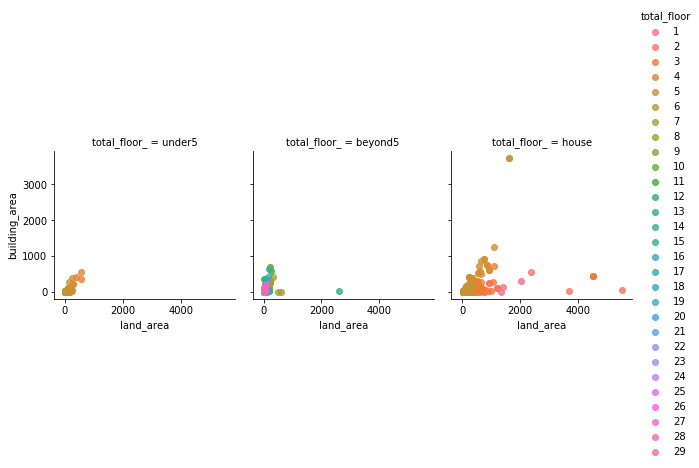

<Figure size 1440x1440 with 0 Axes>

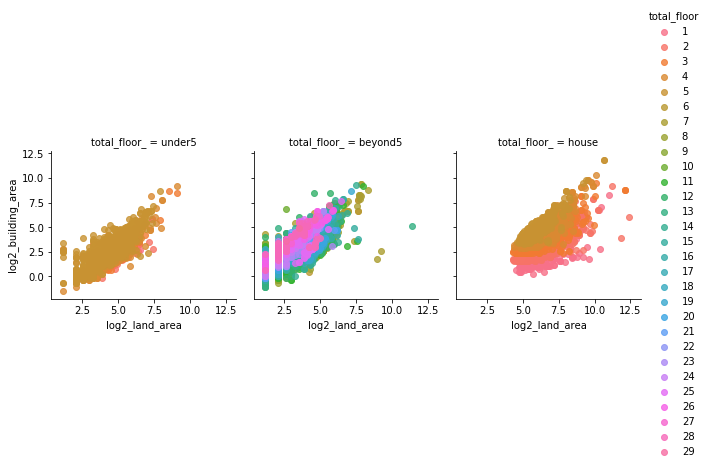

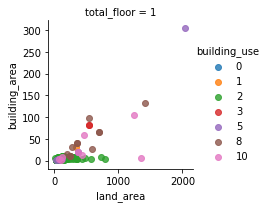

In [45]:
txn_floor_null = data_train_[data_train_['txn_floor'].isnull()]

# 檢視其他欄位推測出txn_floor
def describe_txn_floor_null():
    display(txn_floor_null.describe())
    #Correlation
    display(data_train_[data_train_.columns[1:]].corr()['txn_floor'][:-1]) #total_floor=0.671427, 
    #describe txn_floor_null
    txn_floor_null['total_floor'].describe() #total_floor=[1,5]

# 使用資料為(total_floor=[1,5] & txn_floor.isnotnull())
def describe_total_floor_under5():
    total_floor_under5 = data_train_.query('txn_floor >= 1 and txn_floor <= 5')
    total_floor_under5.describe()
    #作圖看total_floor_under5['txn_floor']分佈,決定如何取值
    plt.figure()
    sns.distplot(total_floor_under5['txn_floor'], 10).set(xlabel='total_floor_under5_txn_floor')

# 遺漏 or 獨棟 or 農舍
def apartment_house():
    #比較(txn_floor_null, total_floor_under5) => 推測是獨棟
    plt.figure(figsize=(20,20))
    sns.lmplot( x='land_area', y='building_area', data=txn_floor_null, fit_reg=True, hue='total_floor', legend=False)
    plt.figure() 
    sns.lmplot( x='land_area', y='building_area', data=total_floor_under5, fit_reg=False, hue='total_floor', legend=False)
    
    txn_floor_null['log2_land_area'] = np.log2(txn_floor_null['land_area'])
    txn_floor_null['log2_building_area'] = np.log2(txn_floor_null['building_area'])
    total_floor_under5['log2_land_area'] = np.log2(total_floor_under5['land_area'])
    total_floor_under5['log2_building_area'] = np.log2(total_floor_under5['building_area'])
    plt.figure()
    sns.lmplot(x='log2_land_area', y='log2_building_area', data=txn_floor_null, fit_reg=True, hue='total_floor', legend=False)
    plt.figure()
    sns.lmplot(x='log2_land_area', y='log2_building_area', data=total_floor_under5, fit_reg=True, hue='building_use', legend=False)
    
# describe_txn_floor_null()
# describe_total_floor_under5()
# apartment_house()
# data_train['txn_floor'] = data_train['txn_floor'].fillna(999)



# 檢視"獨棟or公寓<5or公寓>5"的scatterPlot(building_area,land_area)
def aparB5_aparU5_house():
    # multiPlot 進化成 subPlot => 同樣級距的x,y軸
    def multiPlot():
        total_floor_under5 = data_train_.query('txn_floor >= 1 and txn_floor <= 5')
        total_floor_beyond5 = data_train_.query('txn_floor >5')
        plt.figure()
        sns.lmplot( x='land_area', y='building_area', data=txn_floor_null, fit_reg=True, hue='total_floor', legend=False)
        plt.figure() 
        sns.lmplot( x='land_area', y='building_area', data=total_floor_under5, fit_reg=False, hue='total_floor', legend=False)
        plt.figure() 
        sns.lmplot( x='land_area', y='building_area', data=total_floor_beyond5, fit_reg=False, hue='total_floor', legend=False)
    
    def subPlot():
        def total_floor_(data_train_):
            if (data_train_['txn_floor'] >= 1 and data_train_['total_floor'] > 5):
                return "beyond5"
            elif (data_train_['txn_floor'] >= 1 and data_train_['total_floor'] <= 5):
                return "under5"
            else:
                return "house"

        data_train_['total_floor_'] = data_train_.apply(total_floor_, axis=1)
        plt.figure(figsize=(20,20))
        g = sns.FacetGrid(data_train_, col="total_floor_", hue="total_floor")
        g.map(plt.scatter, "land_area", "building_area", alpha=.8)
        g.add_legend();

    def log_subPlot():
        data_train_['log2_land_area'] = np.log2(data_train_['land_area'])
        data_train_['log2_building_area'] = np.log2(data_train_['building_area'])        
        plt.figure(figsize=(20,20))
        g = sns.FacetGrid(data_train_, col="total_floor_", hue="total_floor")
        g.map(plt.scatter, "log2_land_area", "log2_building_area", alpha=.8)
        g.add_legend()

    subPlot()
    log_subPlot()
    
aparB5_aparU5_house()    
 


# 檢視 total_floor＝1 的scatterPlot(building_area,land_area)
def total_floor_1():
    # sns.lmplot( x='land_area', y='building_area', data=data_train_.query('total_floor==1'), fit_reg=True, hue='building_material', legend=False)
    data=data_train_.query('total_floor==1')
    g = sns.FacetGrid(data, col="total_floor", hue="building_use")
    g.map(plt.scatter, "land_area", "building_area", alpha=.8)
    g.add_legend()

total_floor_1()   
display(data_train_.query('total_floor==1').describe())   

    
        

### Missing Value
> parking_area               56897  
parking_price              46065  
txn_floor                  15902  
village_income_median       1142  

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500) #設定顯示最大欄數
pd.set_option('display.max_rows', 1000) #設定顯示最大列數
from scipy import stats

#input data
dir_data = "/Users/Hanna/Desktop/_Python/realEstateValution_ESB/dataset/"
data_train_ = pd.read_csv(dir_data + 'train.csv')
data_train = data_train_.fillna(0)
data_test = pd.read_csv(dir_data + 'test.csv')